In [1]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 5.1 MB/s 
     |████████████████████████████████| 22.7 MB 1.3 MB/s 


In [2]:
import deepchem as dc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RDKit
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps

In [3]:
from rdkit import Chem
from rdkit.Chem.rdchem import RWMol
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
from pathlib import Path

content_path = Path('/content/drive/MyDrive/chem_data')

In [6]:
# file_path = content_path + '/tid11.sdf'
supp = Chem.SDMolSupplier(f"{content_path}/tid15.sdf")

In [7]:
mols = [x for x in supp]
len(mols)

1221

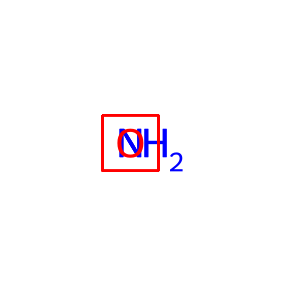

In [ ]:
Draw.MolToImage(mols[110], wedgeBonds=False)

In [ ]:
mols[0].GetProp("_Name")

''

In [8]:
pki_values = []
for mol in supp:
  pki_values.append(mol.GetProp("pKi"))
  # print(mol.GetProp("pKi"))

In [12]:
# find pKi values 
pki_values.index('5500.0')

25

In [14]:
len(pki_values)

1221

In [15]:
len(mols)

1221

In [13]:
smiles = []
for m in mols:
  smiles.append(Chem.MolToSmiles(m))

In [16]:
smiles[25]

'Oc1ccccc1'

In [22]:
smiles[10]

'Nc1ccc(S(=O)(=O)NCCc2ccc(S(N)(=O)=O)cc2)cc1'

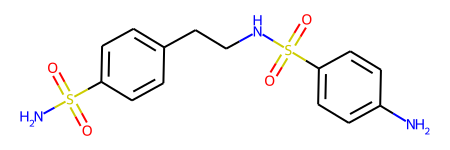

In [23]:
eg = Chem.MolFromSmiles(smiles[10])
eg

In [ ]:
pki_values[0]

'6.8'

In [ ]:
pki_num = []
for i in pki_values:
  pki_num.append(float(i))
print(len(pki_num))
print(pki_num[0])

654
6.8


In [ ]:
# create csv file

import csv

data_dict = {'smiles': smiles, 'pki': pki_num}
data_df = pd.DataFrame(data_dict)

data_df.to_csv('/content/drive/MyDrive/chem_data/tid15.csv')


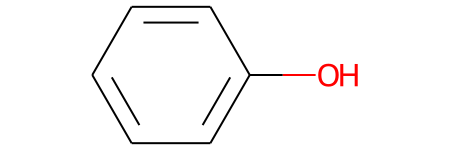

In [17]:
example = Chem.MolFromSmiles(smiles[25])
example

In [ ]:
pki_values[0]

'6.8'

In [ ]:
# Convert to graph
!pip install igraph
import igraph

     |████████████████████████████████| 3.1 MB 14.2 MB/s 


In [ ]:
def mol2graph(mol):
    # atoms_info = [ (atom.GetIdx(), atom.GetAtomicNum(), atom.GetSymbol(), atom.GetBonds()) for atom in mol.GetAtoms()]
    atoms_info = [ (atom.GetIdx(), atom.GetAtomicNum(), atom.GetSymbol()) for atom in mol.GetAtoms()]
    bonds_info = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.GetBondTypeAsDouble()) for bond in mol.GetBonds()]
    graph = igraph.Graph()
    for atom_info in atoms_info:
        # graph.add_vertex(atom_info[0], AtomicNum=atom_info[1], AtomicSymbole=atom_info[2], atomic_bonds = atoms_info[3])
        graph.add_vertex(atom_info[0], AtomicNum=atom_info[1], AtomicSymbole=atom_info[2])
    for bond_info in bonds_info:
        graph.add_edge(bond_info[0], bond_info[1], BondType=bond_info[2], BondTypeAsDouble=bond_info[3])
    return graph

In [ ]:
graph_example = mol2graph(example)

In [ ]:
graph_example

In [ ]:
graph_example.get_edgelist()

[(0, 1),
 (1, 2),
 (2, 3),
 (2, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (10, 12),
 (9, 13),
 (13, 14),
 (4, 15),
 (15, 16),
 (16, 17),
 (16, 18),
 (16, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27),
 (27, 28),
 (1, 29),
 (29, 30),
 (30, 31),
 (31, 32),
 (32, 33),
 (6, 14),
 (19, 28),
 (29, 33),
 (22, 27)]

In [ ]:
graph_example.get_vertex_dataframe()

,AtomicNum,AtomicSymbole,name
vertex ID,,,
0,6,C,0
1,7,N,1
2,6,C,2
3,8,O,3
4,6,C,4
5,6,C,5
6,6,C,6
7,6,C,7
8,6,C,8


In [ ]:
graph_example.get_edge_dataframe()

,source,target,BondType,BondTypeAsDouble
edge ID,,,,
0,0,1,1,1.0
1,1,2,1,1.0
2,2,3,2,2.0
3,2,4,1,1.0
4,4,5,1,1.0
5,5,6,1,1.0
6,6,7,12,1.5
7,7,8,12,1.5
8,8,9,12,1.5


In [ ]:
! pip install torch
!pip install torch-geometric torch-sparse torch-scatter
# !pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv

  Using cached torch_geometric-2.0.4-py3-none-any.whl
  Using cached torch_sparse-0.6.13.tar.gz (48 kB)
  Using cached torch_scatter-2.0.9.tar.gz (21 kB)
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl size=1710393 sha256=f653c1cf29780ff5a1b3e184c2fead472cf740ae733c1dae1067226583ed9912
  Stored in directory: /root/.cache/pip/wheels/e0/01/be/6b2966e0ff20bb023ae35e5d17903e6e5b4df46dd5892f6be6
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=3577519 sha256=4338ae40f8327023ddf1f81e9c5b32de104439fa045b64dc30d73c3b5974049c
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-sparse torch-scatter


In [ ]:
# Training 
import torch
from torch_geometric.data import DataLoader

import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.nn import global_mean_pool as gap

ModuleNotFoundError: ignored

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, n_features, hidden_channels, dropout=0.2):
        """
        Initialise layers of GCN model.
        """
        super(GCN, self).__init__()
        torch.manual_seed(21)
        self.conv1 = GCNConv(n_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, int(hidden_channels/2))
        self.conv3 = GCNConv(int(hidden_channels/2), int(hidden_channels/4))
        self.linear = Linear(int(hidden_channels/4), 1)
        self.dropout = dropout

    def forward(self, data, edge_index, batch):
        """
        Define forward method of the model for regression task and calculate loss.
        """
        x, targets = data.x, data.y
        # 1. Obtain the node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Aggregating message passing/embeddings
        x = gap(x, batch)

        # 3. Apply the final regressor
        x = F.dropout(x, p=self.dropout, training=self.training)

        # 4. model output from forward and loss
        out = self.linear(x)

        loss = torch.nn.MSELoss()(out, targets.reshape(-1, 1).type_as(out))

        return out, loss
